In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv('formness_data.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149083 entries, 0 to 149082
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   text            149083 non-null  object 
 1   Company         149083 non-null  object 
 2   year            149083 non-null  int64  
 3   Label           149083 non-null  object 
 4   sim_score       149083 non-null  float64
 5   Formness_score  149083 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.0+ MB


<Axes: >

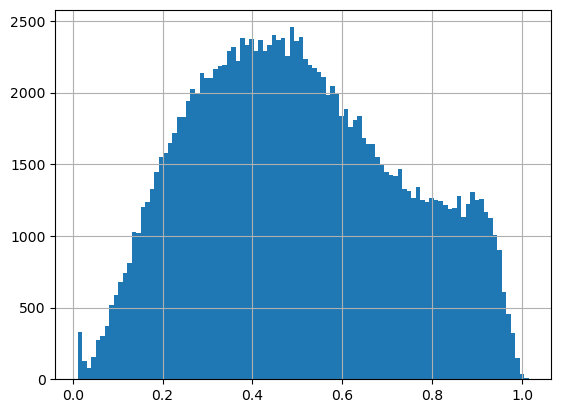

In [11]:
df.Formness_score.hist(bins=100)

In [5]:
df[df["Formness_score"]<0.2]

,text,Company,year,Label,sim_score,Formness_score
1,"and encourage you, to confront, challenge and ...",Porsche,2016,G1,0.802026,0.177600
2,"For inspiration, consider the information re g...",Porsche,2016,G1,0.779666,0.176960
8,"Economic strength, innovative vehicles, custom...",Porsche,2016,G1,0.780832,0.093035
22,Engine plant in Zuffenhausen put into operatio...,Porsche,2016,G1,0.713005,0.193874
24,new drive and test centre in Weissach With the...,Porsche,2016,E1,0.732947,0.183862
...,...,...,...,...,...,...
149076,CG-EC-330a.2 (1) Voluntary turnover rate for a...,Zalando,2021,S1,0.796875,0.168093
149078,CG-EC-330a.4 Percentage of technical employees...,Zalando,2021,S1,0.754480,0.169329
149079,CG-EC-410a.1 Total greenhouse gas (GHG) footpr...,Zalando,2021,E1,0.835030,0.175079
149081,CG-EC-000.A Entity-defined measure of user act...,Zalando,2021,S4,0.760232,0.153812


In [6]:
i=0
all_samples=[]
# take 10 random samples from each Formness score  with 0.1 increment
while i < df.Formness_score.max():
    samples =(df[(df["Formness_score"]>i) & (df["Formness_score"]<i+0.1)].sample(10))
    all_samples.append(samples)
    i+=0.1

In [7]:
df_samples = pd.concat(all_samples)

In [8]:
# function to make text easier to ready by human
# converts long line of text to paragrah by addind new line at every x characters (x=64)
def insert_newlines(string, every=64):
    return ' \n '.join(string[i:i+every] for i in range(0, len(string), every))

In [9]:
df_samples["text"]=df_samples["text"].apply(insert_newlines)

In [ ]:
df_samples.to_csv("Formness_samples.csv")

In [ ]:
df_samples["Formness_score"].corr(df_samples["sim_score"])

0.011773691510439334